In [8]:
pip install git+https://github.com/lukemelas/pytorch-pretrained-gans

  Cloning https://github.com/lukemelas/pytorch-pretrained-gans to /tmp/pip-req-build-jukdlr_y
  Running command git clone --filter=blob:none --quiet https://github.com/lukemelas/pytorch-pretrained-gans /tmp/pip-req-build-jukdlr_y
  Resolved https://github.com/lukemelas/pytorch-pretrained-gans to commit 2982fdab4e683165e45bc2f4a64c2942a7a3a1b7
  Preparing metadata (setup.py) ... done
  Created wheel for pytorch-pretrained-gans: filename=pytorch_pretrained_gans-0.0.1-py3-none-any.whl size=183852 sha256=f7cdf0f5b21093f2d3dc72b56ab33dd0412d272c0fd7c18d59eb1eaa38438ace
  Stored in directory: /tmp/pip-ephem-wheel-cache-8bujdcym/wheels/1d/8a/47/13f79126bd2899ff579333c8a7a907c35d1175f95174cec8a5
Successfully built pytorch-pretrained-gans


In [10]:
pip install boto3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 11.1 MB/s eta 0:00:00


In [11]:
import torch
from pytorch_pretrained_gans import make_gan

In [12]:
G = make_gan(gan_type='biggan')

100%|██████████| 715/715 [00:00<00:00, 1049677.06B/s]


Loading BigGAN model biggan-deep-256 from cache at /root/.pytorch_pretrained_biggan/e7d036ee69a83e83503c46902552573b27d856eaf6b8b84252a63a715dce7501.aec5caf3e5c5252b8857d6bb8adefa8d1d6092a8ba6c9aaed1e6678f8a46be43


In [13]:
import requests

# Fetch ImageNet class labels
url = 'https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt'
response = requests.get(url)
class_labels = response.text.split('\n')

# Print class labels along with their indices
for i, label in enumerate(class_labels):
    print(f"{i}: {label}")


0: tench
1: goldfish
2: great white shark
3: tiger shark
4: hammerhead
5: electric ray
6: stingray
7: cock
8: hen
9: ostrich
10: brambling
11: goldfinch
12: house finch
13: junco
14: indigo bunting
15: robin
16: bulbul
17: jay
18: magpie
19: chickadee
20: water ouzel
21: kite
22: bald eagle
23: vulture
24: great grey owl
25: European fire salamander
26: common newt
27: eft
28: spotted salamander
29: axolotl
30: bullfrog
31: tree frog
32: tailed frog
33: loggerhead
34: leatherback turtle
35: mud turtle
36: terrapin
37: box turtle
38: banded gecko
39: common iguana
40: American chameleon
41: whiptail
42: agama
43: frilled lizard
44: alligator lizard
45: Gila monster
46: green lizard
47: African chameleon
48: Komodo dragon
49: African crocodile
50: American alligator
51: triceratops
52: thunder snake
53: ringneck snake
54: hognose snake
55: green snake
56: king snake
57: garter snake
58: water snake
59: vine snake
60: night snake
61: boa constrictor
62: rock python
63: Indian cobra
64: gr

In [35]:
waste_index = None
for i, label in enumerate(class_labels):
    if "waste" in label.lower():
        waste_index = i
        break

# If "waste" is found, print its index
if waste_index is not None:
    print(f"The index of 'waste' is: {waste_index}")
else:
    print("The class 'waste' is not present in the ImageNet class labels.")

The class 'waste' is not present in the ImageNet class labels.


##PAPER

In [18]:
num_classes = 1000

paper_class = 700
y_paper = torch.zeros(1, num_classes)
y_paper[0, paper_class] = 1

z_paper = G.sample_latent(batch_size=1)

x_paper = G(z=z_paper, y=y_paper)


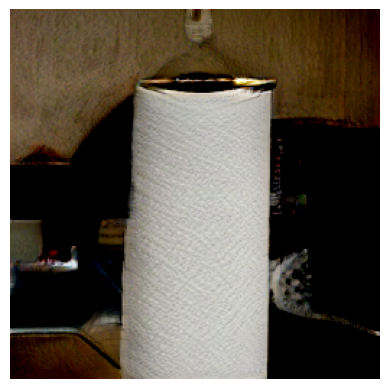

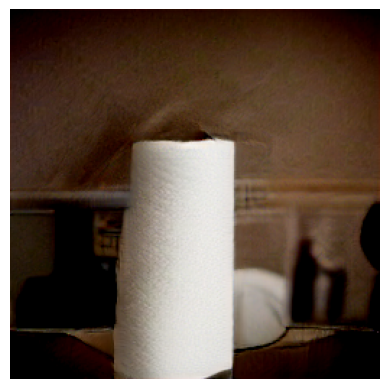

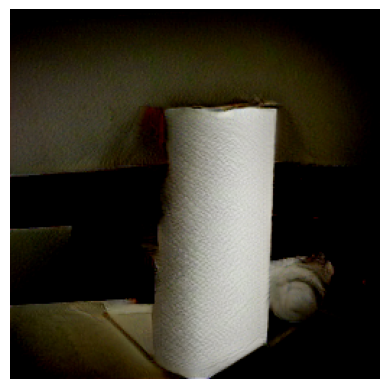

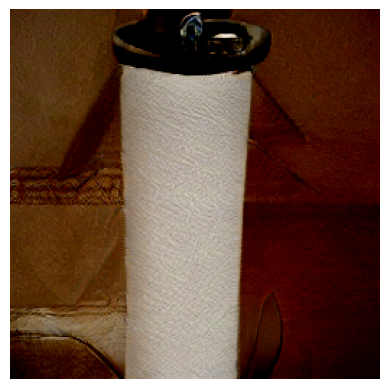

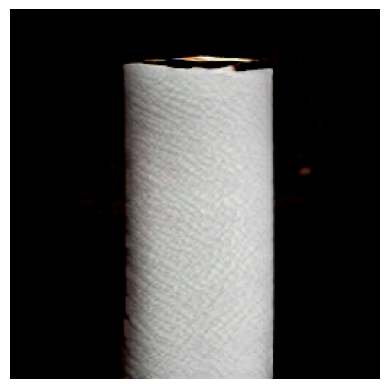

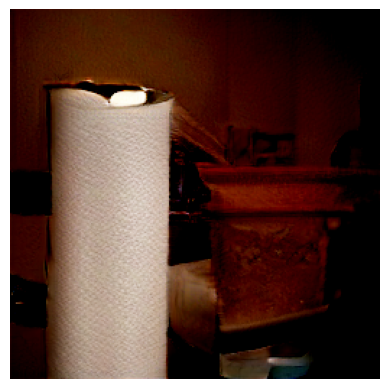

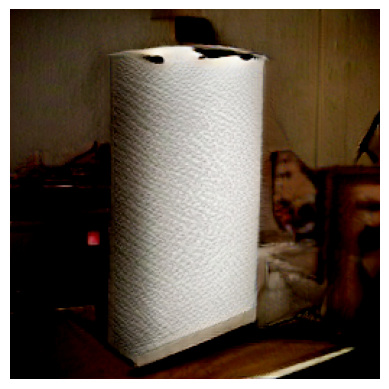

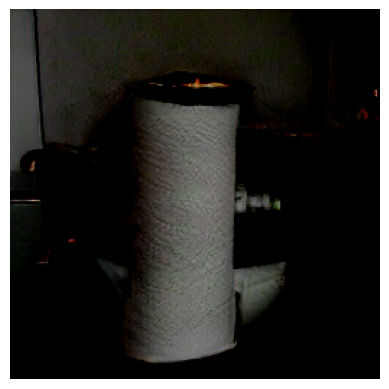

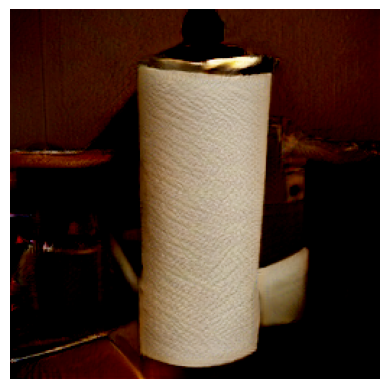

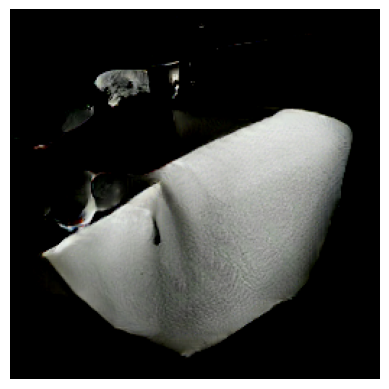

In [22]:
import matplotlib.pyplot as plt

num_samples = 10

for _ in range(num_samples):
    # Sample latent vector
    z_paper = G.sample_latent(batch_size=1)

    y_paper = torch.zeros(1, num_classes)
    y_paper[0, paper_class] = 1

    x_paper = G(z=z_paper, y=y_paper)

    generated_image_np = x_paper[0].permute(1, 2, 0).cpu().detach().numpy()

    plt.imshow(generated_image_np)
    plt.axis('off')
    plt.show()

##GLASS

In [25]:
glass_class = 440
y_paper = torch.zeros(1, num_classes)
y_paper[0, paper_class] = 1

# Sample latent vector
z_paper = G.sample_latent(batch_size=1)

# Generate image for "paper" class
x_paper = G(z=z_paper, y=y_paper)

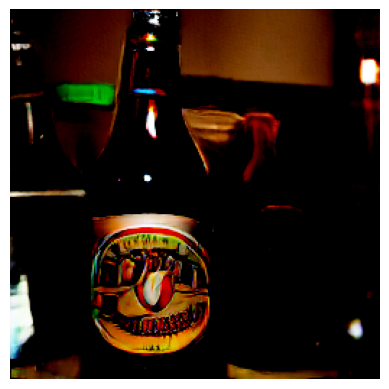

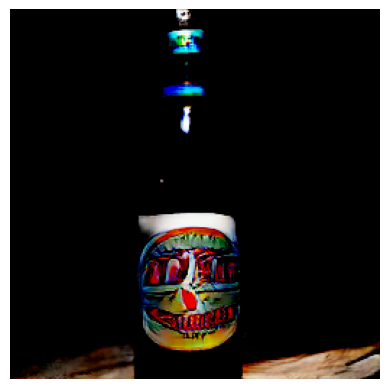

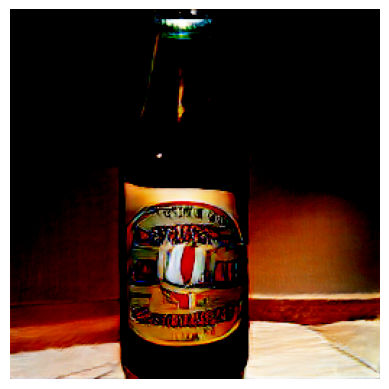

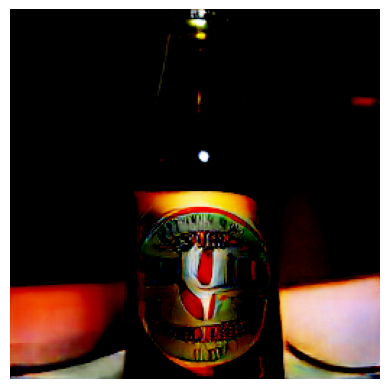

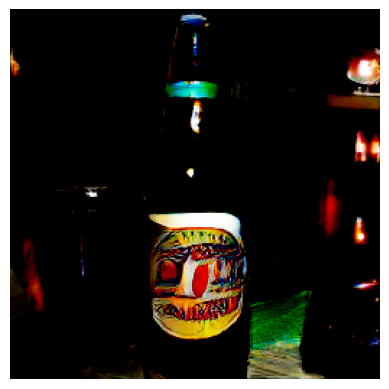

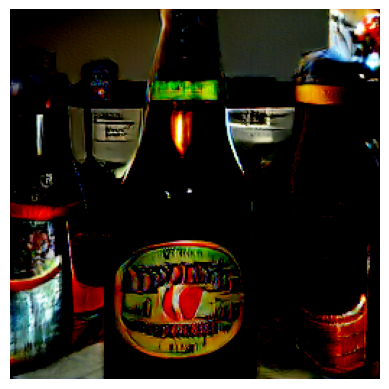

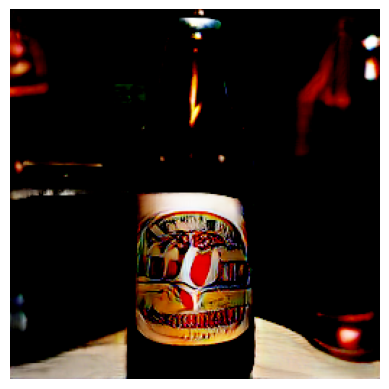

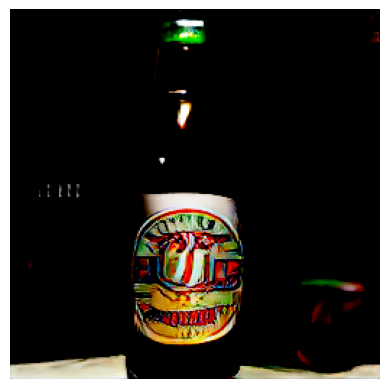

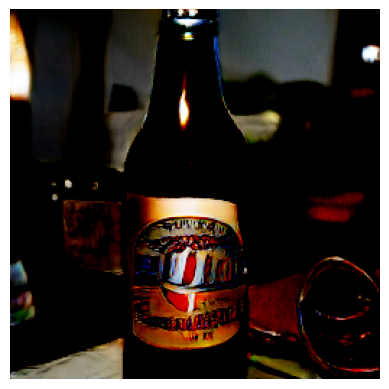

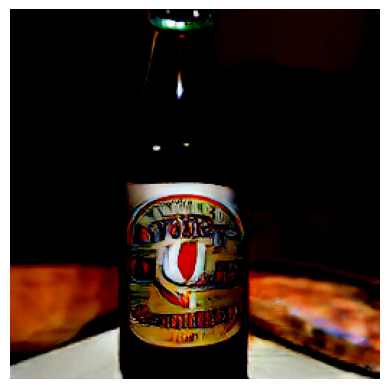

In [26]:
for _ in range(num_samples):
    # Sample latent vector
    z_glass = G.sample_latent(batch_size=1)

    # Create a one-hot encoded vector for the "glass" class
    y_glass = torch.zeros(1, num_classes)
    y_glass[0, glass_class] = 1

    # Generate image for "glass" class
    x_glass = G(z=z_glass, y=y_glass)

    # Convert the generated image tensor to numpy array
    generated_image_np = x_glass[0].permute(1, 2, 0).cpu().detach().numpy()

    # Display the generated image
    plt.imshow(generated_image_np)
    plt.axis('off')
    plt.show()

In [28]:
glass_class = 441
y_paper = torch.zeros(1, num_classes)
y_paper[0, paper_class] = 1

# Sample latent vector
z_paper = G.sample_latent(batch_size=1)

# Generate image for "paper" class
x_paper = G(z=z_paper, y=y_paper)

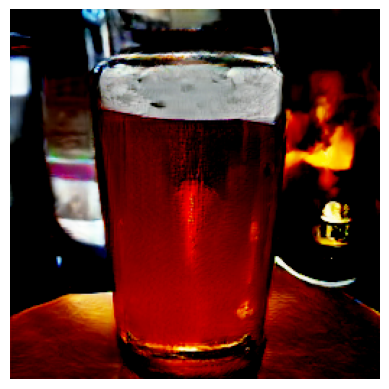

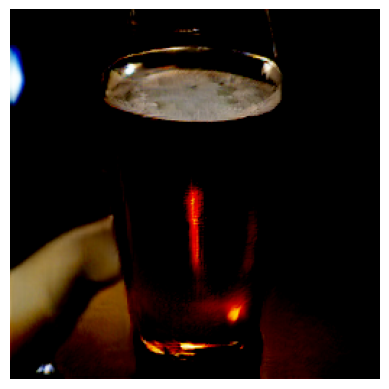

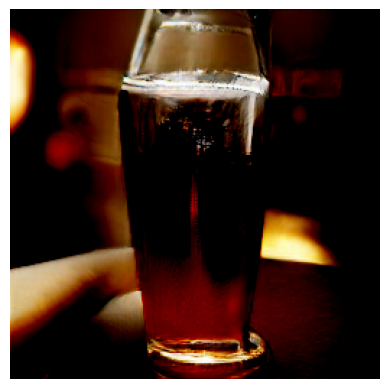

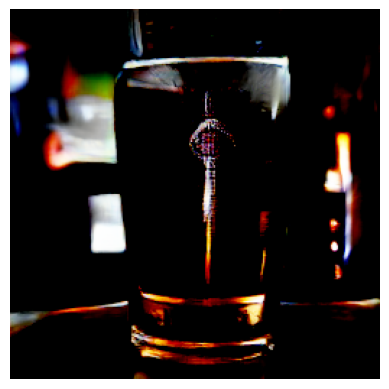

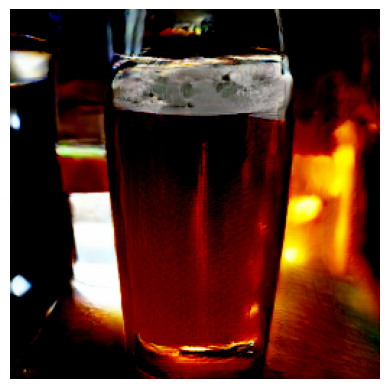

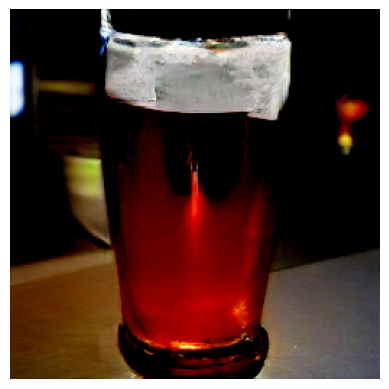

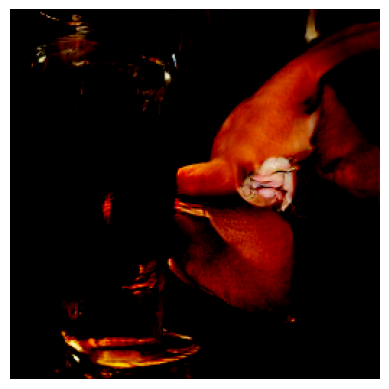

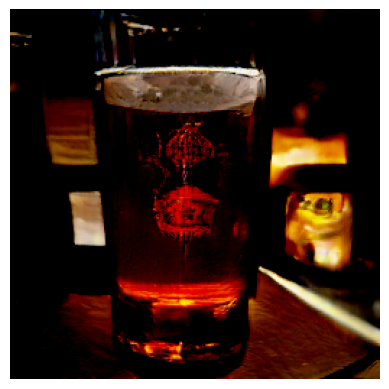

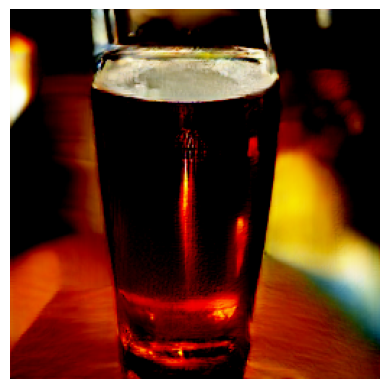

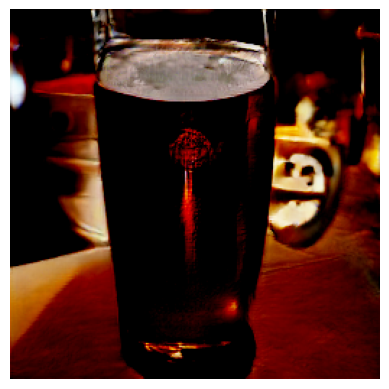

In [29]:
for _ in range(num_samples):
    # Sample latent vector
    z_glass = G.sample_latent(batch_size=1)

    # Create a one-hot encoded vector for the "glass" class
    y_glass = torch.zeros(1, num_classes)
    y_glass[0, glass_class] = 1

    # Generate image for "glass" class
    x_glass = G(z=z_glass, y=y_glass)

    generated_image_np = x_glass[0].permute(1, 2, 0).cpu().detach().numpy()

    plt.imshow(generated_image_np)
    plt.axis('off')
    plt.show()

##PLASTIC

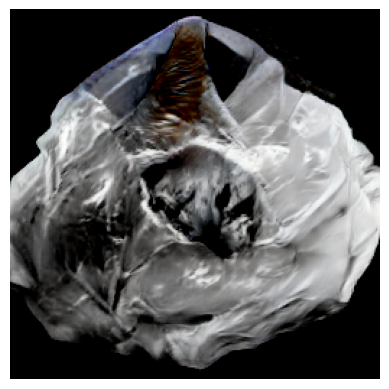

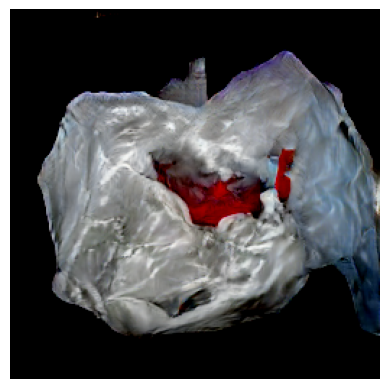

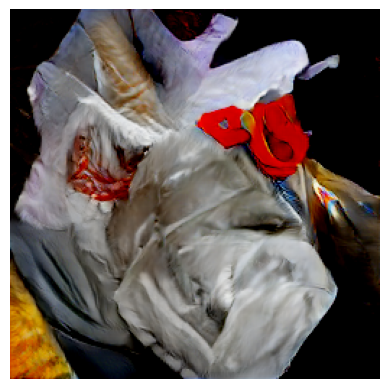

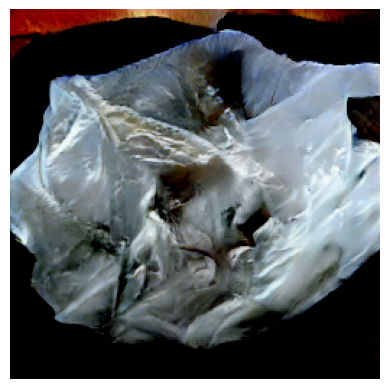

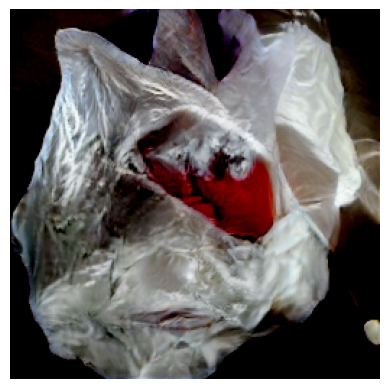

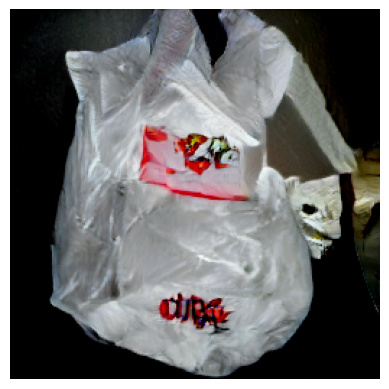

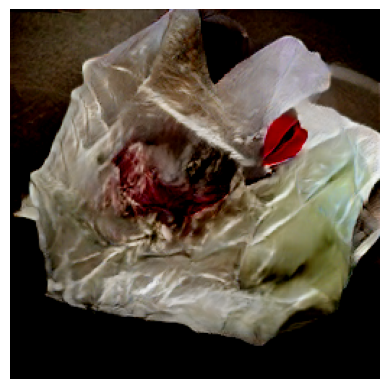

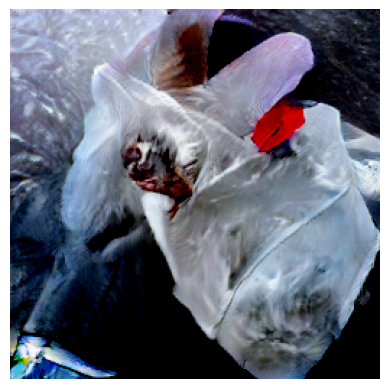

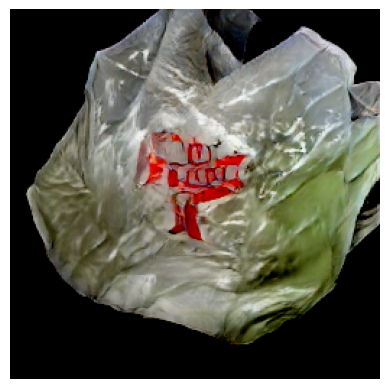

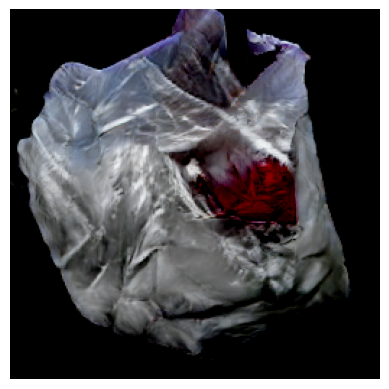

In [32]:
plastic_class = 728
y_plastic = torch.zeros(1, num_classes)
y_plastic[0, plastic_class] = 1

# Sample latent vector
z_plastic = G.sample_latent(batch_size=1)

# Generate image for "plastic" class
x_plastic = G(z=z_plastic, y=y_plastic)

for _ in range(num_samples):
    # Sample latent vector
    z_plastic = G.sample_latent(batch_size=1)

    # Create a one-hot encoded vector for the "plastic" class
    y_plastic = torch.zeros(1, num_classes)
    y_plastic[0, plastic_class] = 1

    # Generate image for "plastic" class
    x_plastic = G(z=z_plastic, y=y_plastic)

    # Convert the generated image tensor to numpy array
    generated_image_np = x_plastic[0].permute(1, 2, 0).cpu().detach().numpy()

    # Display the generated image
    plt.imshow(generated_image_np)
    plt.axis('off')
    plt.show()